In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/grassknoted/asl-alphabet')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nguyenthanhlongsn
Your Kaggle Key: ··········


100%|██████████| 1.03G/1.03G [00:06<00:00, 174MB/s]


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
#just run for first time
def resize_img(path='/content/asl-alphabet'):
  lst_fol = os.listdir(path)

  for fol in lst_fol:

    path_1 = path + '/' + fol + '/' + fol
    lst_classes = os.listdir(path_1)

    if fol.split('_')[-1] == 'test':

      for name in lst_classes:

        im = Image.open(path_1 + '/' + name)
        im = im.resize((32,32))
        im = im.save(path_1 + '/' + name)
    
    else:
      
      for name_class in lst_classes:

        path_2 = path_1 + '/' + name_class
        lst_name = os.listdir(path_2)

        for name in lst_name:
          
          im = Image.open(path_2 + '/' + name)
          im = im.resize((32,32))
          im = im.save(path_2 + '/' + name)
resize_img()

In [ ]:
def load_data(path='/content/asl-alphabet'):
  lst_fol = os.listdir(path)

  x_train = []
  y_train = []
  x_val = []
  y_val = []
  x_test = []
  y_test =[]

  for fol in lst_fol:

    path_1 = path + '/' + fol + '/' + fol
    lst_classes = os.listdir(path_1)

    if fol.split('_')[-1] == 'test':

      for name in lst_classes:

        x_test.append(np.array(Image.open(path_1 + '/' + name)))
        y_test.append(name.split('_')[0])
    
    else:
      
      for name_class in lst_classes:

        path_2 = path_1 + '/' + name_class
        lst_name = os.listdir(path_2)

        for name in lst_name:

          x_train.append(np.array(Image.open(path_2 + '/' + name)))
          y_train.append(name_class)

        x_val += x_train[-32:]
        y_val += y_train[-32:]
        x_train = x_train[:-32]
        y_train = y_train[:-32]

  return (x_train, y_train), (x_val, y_val), (x_test, y_test)

In [ ]:
def pre_tranning(data):

  (x_train, y_train), (x_val, y_val), (x_test, y_test) = data

  def class_to_int(inx, classes):

    for i in range(len(classes)):
      classes[i] = inx[classes[i]]
    
    return np.array(classes)

  inx = {key:value for value, key in enumerate(sorted(set(y_train)))}
  classes = {value:key for value, key in enumerate(sorted(set(y_train)))}
    
  x_train, x_test, x_val = np.asarray(x_train) / 255, np.asarray(x_test) / 255 , np.asarray(x_val) / 255 
  y_train = class_to_int(inx, y_train)
  y_test = class_to_int(inx, y_test)
  y_val = class_to_int(inx, y_val)
  
  per_train = np.random.permutation(len(x_train))
  per_val = np.random.permutation(len(x_val))
  per_test = np.random.permutation(len(x_test))
  
  x_train = x_train[per_train]
  y_train = y_train[per_train]
  x_val = x_val[per_val]
  y_val = y_val[per_val]
  x_test = x_val[per_test]
  y_test = y_val[per_test]
  
  return classes, ((x_train, y_train), (x_val, y_val), (x_test, y_test))

In [ ]:
data = load_data()

In [ ]:
classes, data = pre_tranning(data)

In [ ]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = data

In [ ]:
n = len(set(y_train))
model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), padding='Same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(n, activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                      

Epoch 1/10
2690/2690 [==============================] - 281s 105ms/step - loss: 0.1010 - accuracy: 0.9679 - val_loss: 10.8356 - val_accuracy: 0.3879
Epoch 2/10
2690/2690 [==============================] - 275s 102ms/step - loss: 0.0780 - accuracy: 0.9754 - val_loss: 0.2438 - val_accuracy: 0.9386
Epoch 3/10
2690/2690 [==============================] - 275s 102ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.2509 - val_accuracy: 0.9472
Epoch 4/10
2690/2690 [==============================] - 273s 102ms/step - loss: 0.0517 - accuracy: 0.9848 - val_loss: 0.4064 - val_accuracy: 0.9073
Epoch 5/10
2690/2690 [==============================] - 278s 103ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0824 - val_accuracy: 0.9731
Epoch 6/10
2690/2690 [==============================] - 275s 102ms/step - loss: 0.0455 - accuracy: 0.9873 - val_loss: 0.0557 - val_accuracy: 0.9828
Epoch 7/10
2690/2690 [==============================] - 279s 104ms/step - loss: 0.0373 - accuracy: 0.9885 - val

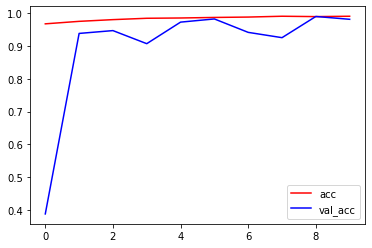

In [ ]:
res = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
plt.plot(res.history['accuracy'], label='acc', color='red')
plt.plot(res.history['val_accuracy'], label='val_acc', color='blue')
plt.legend()

1/1 [==============================] - 0s 20ms/step


<function matplotlib.pyplot.show(*args, **kw)>

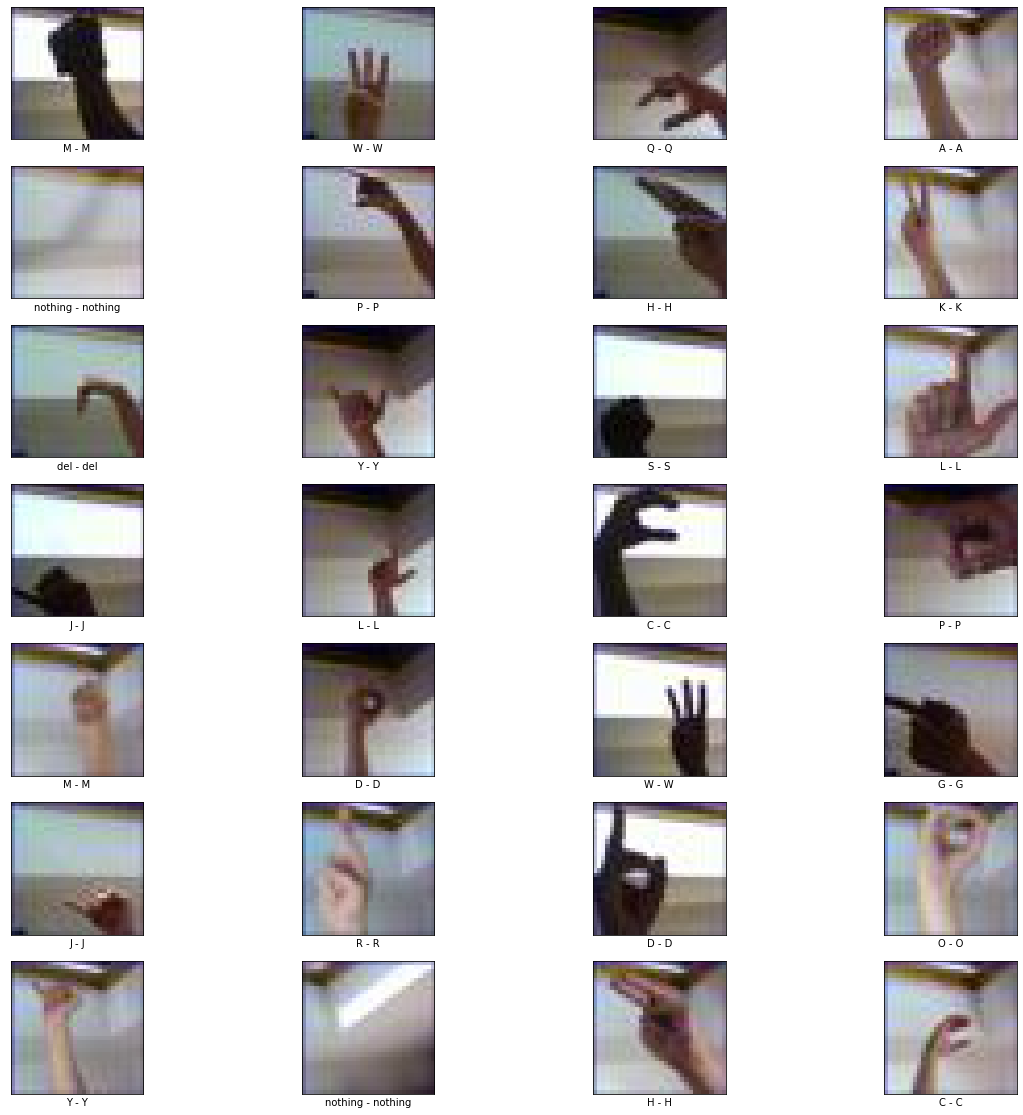

In [ ]:
plt.figure(figsize=(20,20))
for i in range(28):
    plt.subplot(7,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    n = np.array(x_test[i])
    p = n.reshape(1, 32, 32, 3)
    predicted = model.predict(p).argmax()
    plt.xlabel(classes[predicted] + ' - ' + classes[y_test[i]])
plt.show

In [37]:
model.save('/content/drive/MyDrive/Colab Notebooks/parameters.h5')